# Patterned Loading
This is an implementation of the Patterned Loading feature. For the design specification please see the document Specification.md.

Ultimately, these tools will be used to reproduce the Patterned Loading experiments explained in the paper by S. Peil
1. Peil, S. & Porto, J. & Tolra, & Laburthe, B. & Obrecht, John & King, B. & Subbotin, M. & Rolston, Steven & Phillips, William. (2003). Patterned loading of a Bose-Einstein condensate into an optical lattice. Phys. Rev. A. 67. 051603. 10.1103/PhysRevA.67.051603. 

In [1]:
from oqtant.schemas.quantum_matter import QuantumMatterFactory
from oqtant.schemas.quantum_matter import QuantumMatter as qm
from oqtant.schemas.output import Gaussian_dist_2D
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import scipy.optimize as opt
from IPython.display import HTML

qmf = QuantumMatterFactory()
qmf.get_login()

Auth(children=(HBox(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x12\x00\x00\x00\xc…

In [2]:
qmf.get_client()

Job Limits:
╒═══════════════╤═══════════════════╤════════════════════╤════════════════════╕
│   Daily Limit │   Daily Remaining │   Standard Credits │   Priority Credits │
╞═══════════════╪═══════════════════╪════════════════════╪════════════════════╡
│            20 │                20 │                 96 │                  0 │
╘═══════════════╧═══════════════════╧════════════════════╧════════════════════╛


In [3]:
from PatternedLoadingPkg.PatternedLoader import PatternedLoader

In [4]:
pl = PatternedLoader(qmf, "LongOnly")

s_pot = 10.0 #kHz
s_delay = 2. #ms
s_rise = 2. #ms also fall
s_hold = 2. #ms
short = pl.Lattice()
short.set_potential(s_pot)
short.set_loading_seq(s_delay, s_rise, s_hold)

l_pot = 2. #kHz
l_delay = 0. #ms
l_rise = 2. #ms also fall
l_hold = 2. #ms
long = pl.Lattice()

long.set_potential(l_pot)
long.set_loading_seq(l_delay, l_rise, l_hold)

pl.set_superlattice(long, short)
pl.print_superlattice()

short pot: 10.0
long pot: 2.0


In [5]:
matter = pl.get_matter()

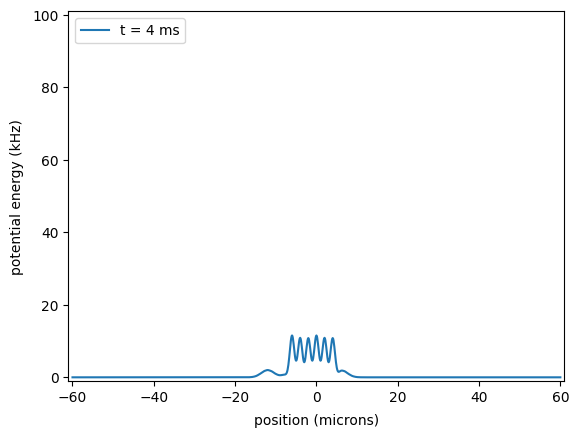

In [6]:
matter.show_potential(times=[4], include_ideal=False, include_magnetic=False)